<a href="https://colab.research.google.com/github/vivek16pawar/Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [269]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [185]:
# sklearn Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [186]:
# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
# Defining the file path
df = pd.read_csv('/content/drive/MyDrive/Module 4/Coronavirus Sentiment Classification Project/Copy of Coronavirus Tweets.csv',encoding = 'latin')

##Data Inspection

In [188]:
# Overview of data
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [189]:
# Overview of data
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [190]:
# Overview of number of rows and column
df.shape

(41157, 6)

In [191]:
# All tweets came only from March and April month of 2020.
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [192]:
# There are 12220 unique locations from where the tweets came.
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [193]:
# There are 5 unique sentiment types in our dataset
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

### Reviewing what tweets are form different sentiments

In [194]:
df[df['Sentiment']=='Extremely Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative
...,...,...,...,...,...,...
41115,44914,89866,NaN,14-04-2020,Food Banks are not equipped for a 30% unemploy...,Extremely Negative
41128,44927,89879,"Melbourne, Australia",14-04-2020,The COVID-19 pandemic and global oil price war...,Extremely Negative
41130,44929,89881,NaN,14-04-2020,Squeo works in the meat department of a Kroger...,Extremely Negative
41133,44932,89884,Austria,14-04-2020,A Singaporean politician who slammed a woman s...,Extremely Negative


In [195]:
df[df['Sentiment']=='Extremely Negative'].loc[20,'OriginalTweet']

'with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale'

In [196]:
df[df['Sentiment']=='Extremely Negative'].loc[41153,'OriginalTweet']

'Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?'

In [197]:
df[df['Sentiment']=='Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative
...,...,...,...,...,...,...
41127,44926,89878,NaN,14-04-2020,Today at the grocery store I saw someone getti...,Negative
41131,44930,89882,"Accra, Ghana",14-04-2020,In every human affliction there are gainers a...,Negative
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative


In [198]:
df[df['Sentiment']=='Negative'].loc[41149,'OriginalTweet']

'Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .'

In [199]:
df[df['Sentiment']=='Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,3816,48768,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...
41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral
41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral
41144,44943,89895,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having...,Neutral
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [200]:
df[df['Sentiment']=='Neutral'].loc[17,'OriginalTweet']

'@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are "observed"\r\r\nhttps://t.co/4WnrrK9oKC https://t.co/ld05k5Eyns'

In [201]:
df[df['Sentiment']=='Neutral'].loc[16,'OriginalTweet']

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

In [202]:
df[df['Sentiment']=='Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41140,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive
41145,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York C...,Positive
41146,44945,89897,"Gurgaon, India",14-04-2020,#Gold prices rose to a more than 7-year high t...,Positive
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive


In [203]:
df[df['Sentiment']=='Positive'].loc[1,'OriginalTweet']

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [204]:
df[df['Sentiment']=='Positive'].loc[6,'OriginalTweet']

'Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I\'m in Civics class so I know what I\'m talking about". https://t.co/ieFDNeHgDO'

In [205]:
df[df['Sentiment']=='Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41137,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their p...,Extremely Positive
41138,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive
41142,44941,89893,Juba south sudan,14-04-2020,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive


In [206]:
df[df['Sentiment']=='Extremely Positive'].loc[11,'OriginalTweet']

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [207]:
df[df['Sentiment']=='Extremely Positive'].loc[22,'OriginalTweet']

'We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #iptvnew #iptv2020 #Adult'

# Exploratory Data Analysis

In [208]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [210]:
# find the null values
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [211]:
# drop the null values
df.dropna(inplace=True)
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [212]:
df.shape

(32567, 6)

In [213]:
# count of Location
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [214]:
# count of Sentiments
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

In [215]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


##Graphical Representation of Sentiment Column

Text(0, 0.5, 'count')

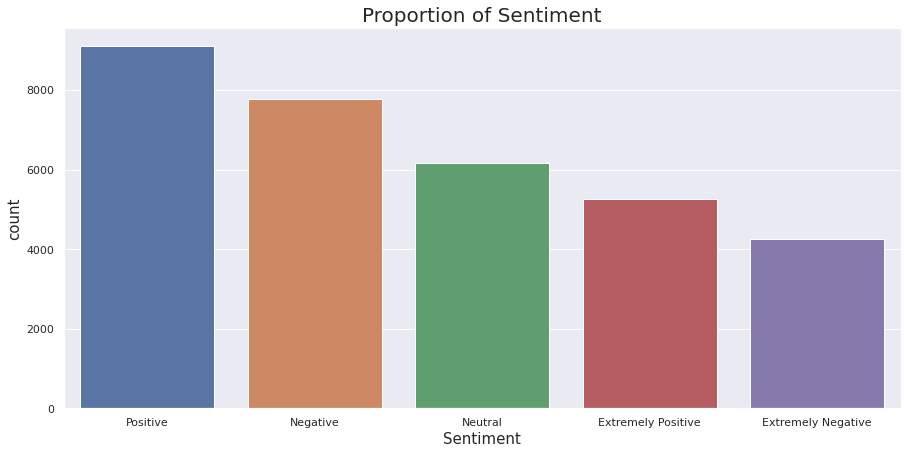

In [216]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=15)
ax.set_ylabel('count', fontsize=15)

In [217]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


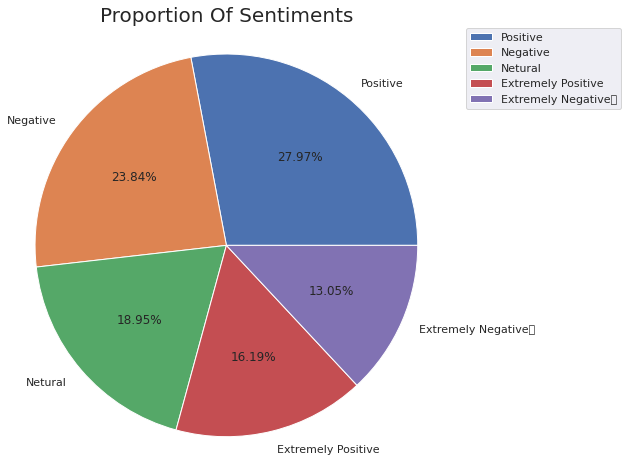

In [219]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural','Extremely Positive','Extremely Negative	']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##Unique values in each column

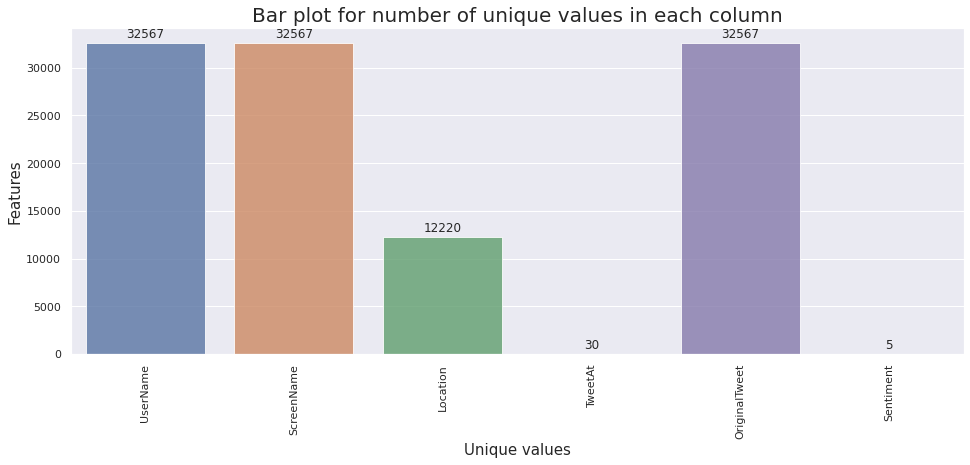

In [220]:
# finding unique values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique = []
for i in df.columns :
  unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(16,6))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches :
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column', fontsize=20)
plt.xlabel('Unique values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

## Countplot for original tweet according to TweetAt column

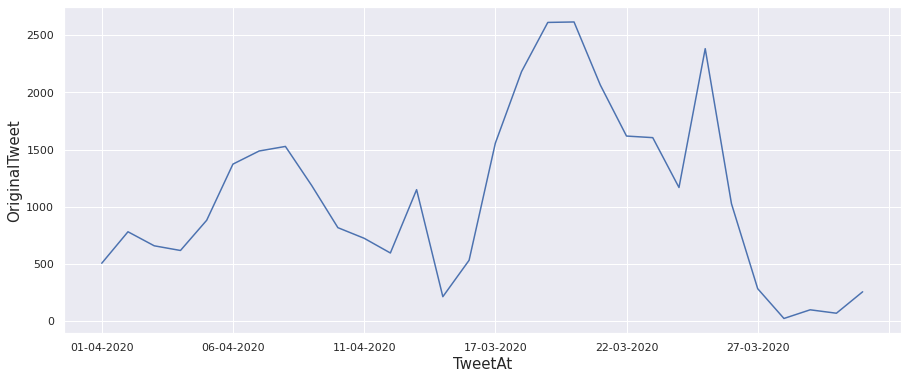

In [221]:
# plotting original tweet according to "TweetAt" column
plt.figure(figsize=(15,6))
grp_tweet = df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.xlabel('TweetAt', fontsize=15)
plt.ylabel('OriginalTweet', fontsize=15)
plt.show()

##Histogram Plot of OriginalTweet

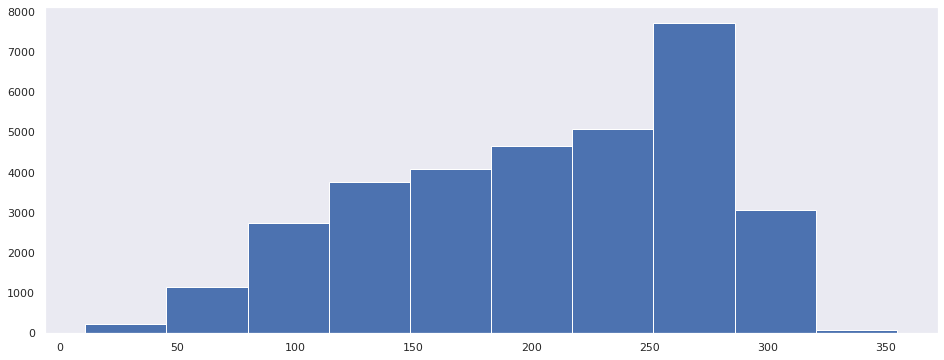

In [222]:
# plotting "OriginalTweet" column
plt.figure(figsize=(16,6))
plt.grid()
plt.hist(df['OriginalTweet'].str.len())
plt.show()

##Top 10 Locations

In [223]:
# getting top 10 locations
top10_location = df['Location'].value_counts().sort_values(ascending = False)[:10]
top10_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

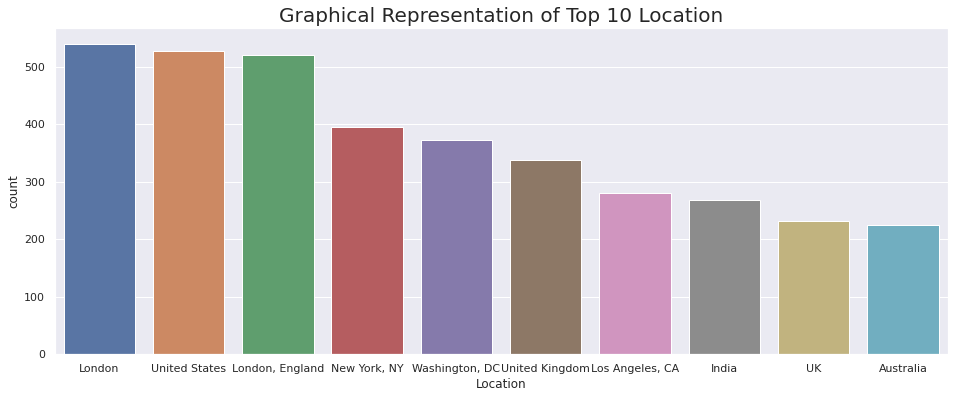

In [224]:
# plotting top 10 location in graaph
plt.figure(figsize=(16,6))
plt.title('Graphical Representation of Top 10 Location', fontsize = 20)
sns.countplot(data = df[df['Location'].isin(top10_location.index)], x='Location', order=top10_location.index)

In [226]:
df['OriginalTweet'].head(15)

0     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1     advice Talk to your neighbours family to excha...
2     Coronavirus Australia: Woolworths to give elde...
5     As news of the regionÂs first confirmed COVID...
6     Cashier at grocery store was sharing his insig...
7     Was at the supermarket today. Didn't buy toile...
8     Due to COVID-19 our retail store and classroom...
9     For corona prevention,we should stop to buy th...
10    All month there hasn't been crowding in the su...
11    Due to the Covid-19 situation, we have increas...
12    #horningsea is a caring community. LetÂs ALL ...
13    Me: I don't need to stock up on food, I'll jus...
15    Lines at the grocery store have been unpredict...
16    ????? ????? ????? ????? ??\r\r\n?????? ????? ?...
17    @eyeonthearctic 16MAR20 Russia consumer survei...
Name: OriginalTweet, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


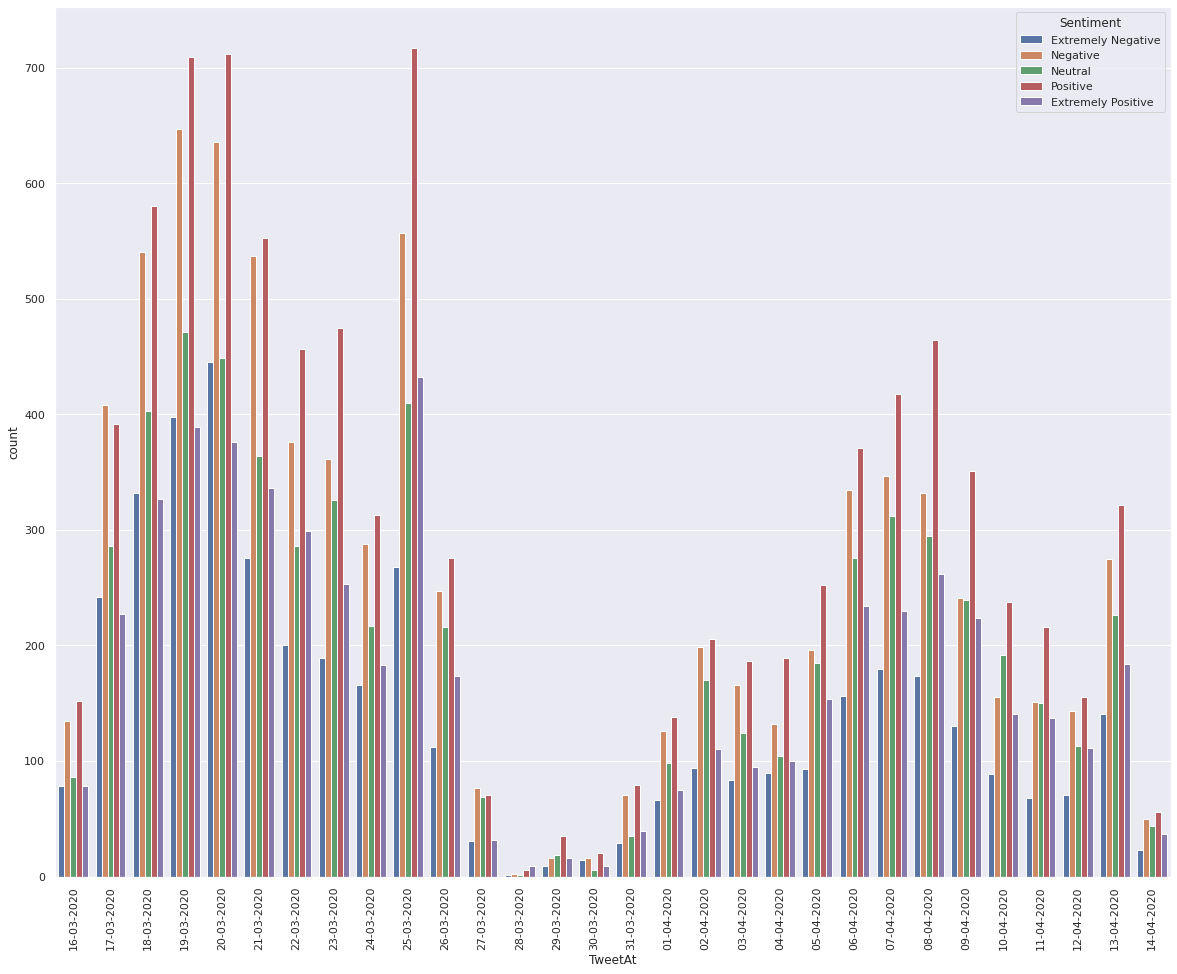

In [225]:
sns.set(rc={'figure.figsize':(20,16)})
sns.countplot(df.TweetAt,hue=df.Sentiment,hue_order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']);
plt.xticks(rotation = 90);

# Feature Engineering

In [227]:
df.reset_index(inplace = True)

## Step 1 Convert to LowerCase

In [228]:
df['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        As news of the regionÂs first confirmed COVID...
4        Cashier at grocery store was sharing his insig...
                               ...                        
32562    YÂall really shitting that much more at home?...
32563    Still shocked by the number of #Toronto superm...
32564    I never that weÂd be in a situation &amp; wor...
32565    Airline pilots offering to stock supermarket s...
32566    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 32567, dtype: object

In [229]:
# Convert text to lower case
df["OriginalTweet"] = df["OriginalTweet"].str.lower()

In [230]:
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        as news of the regionâs first confirmed covid...
4        cashier at grocery store was sharing his insig...
                               ...                        
32562    yâall really shitting that much more at home?...
32563    still shocked by the number of #toronto superm...
32564    i never that weâd be in a situation &amp; wor...
32565    airline pilots offering to stock supermarket s...
32566    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 32567, dtype: object

## Step 2 Removing Punctuations

In [231]:
# Checking type 
type(df['OriginalTweet'])

pandas.core.series.Series

In [232]:
df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [233]:
# Removing http,www words
df['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [234]:
# Function for removing punctuuations
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [235]:
# Applying Function
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)

In [236]:
df['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        as news of the regionâs first confirmed covid...
4        cashier at grocery store was sharing his insig...
                               ...                        
32562    yâall really shitting that much more at home ...
32563    still shocked by the number of toronto superma...
32564    i never that weâd be in a situation amp world...
32565    airline pilots offering to stock supermarket s...
32566    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 32567, dtype: object

In [237]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,Positive,as news of the region s first confirmed covid...
4,6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,Positive,cashier at grocery store was sharing his insig...


In [238]:
df['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

## Step 3 Remove Stop Words

In [239]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [240]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [241]:
df['clean_tweets'][10]

'horningsea caring community let look less capable village ensure stay healthy bringing shopping doors help online shopping self isolation symptoms exposed somebody'

In [242]:
df.head()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv
1,1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,Positive,news region first confirmed covid case came su...
4,6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insights covid p...


## Step 4 Tokenization

In [243]:
# create new variable tokenized tweet 
tokenized_tweet = df['clean_tweets'].apply(lambda x: x.split())

In [244]:
tokenized_tweet.reset_index()

,index,clean_tweets
0,0,"[menyrbie, philgahan, chrisitv]"
1,1,"[advice, talk, neighbours, family, exchange, p..."
2,2,"[coronavirus, australia, woolworths, give, eld..."
3,3,"[news, region, first, confirmed, covid, case, ..."
4,4,"[cashier, grocery, store, sharing, insights, c..."
...,...,...
32562,32562,"[really, shitting, much, home, covid, coronavi..."
32563,32563,"[still, shocked, number, toronto, supermarket,..."
32564,32564,"[never, situation, amp, world, going, supermar..."
32565,32565,"[airline, pilots, offering, stock, supermarket..."


In [245]:
df.head(2)

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv
1,1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...


## Step 5 Stemming

In [246]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [247]:
tokenized_tweet

0                           [menyrbi, philgahan, chrisitv]
1        [advic, talk, neighbour, famili, exchang, phon...
2        [coronaviru, australia, woolworth, give, elder...
3        [news, region, first, confirm, covid, case, ca...
4        [cashier, groceri, store, share, insight, covi...
                               ...                        
32562    [realli, shit, much, home, covid, coronaviru, ...
32563    [still, shock, number, toronto, supermarket, e...
32564    [never, situat, amp, world, go, supermarket, p...
32565    [airlin, pilot, offer, stock, supermarket, she...
32566    [tartiicat, well, newus, rift, go, amazon, rn,...
Name: clean_tweets, Length: 32567, dtype: object

In [248]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])


In [249]:
df['clean_tweets']  = tokenized_tweet

In [250]:
df['clean_tweets']

0                               menyrbi philgahan chrisitv
1        advic talk neighbour famili exchang phone numb...
2        coronaviru australia woolworth give elderli di...
3        news region first confirm covid case came sull...
4        cashier groceri store share insight covid prov...
                               ...                        
32562     realli shit much home covid coronaviru toiletpap
32563    still shock number toronto supermarket employe...
32564    never situat amp world go supermarket pick pac...
32565    airlin pilot offer stock supermarket shelv nz ...
32566    tartiicat well newus rift go amazon rn althoug...
Name: clean_tweets, Length: 32567, dtype: object

### Word Cloud

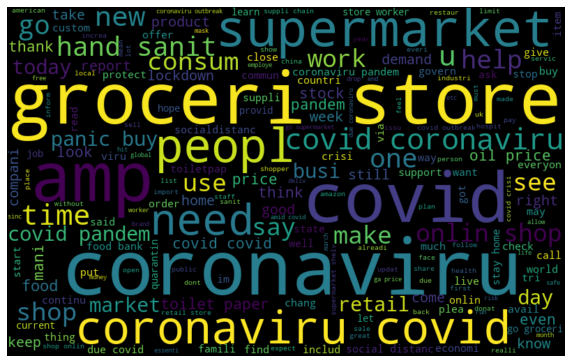

In [251]:
# create text from all tweets
all_words = ' '.join([text for text in df['clean_tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

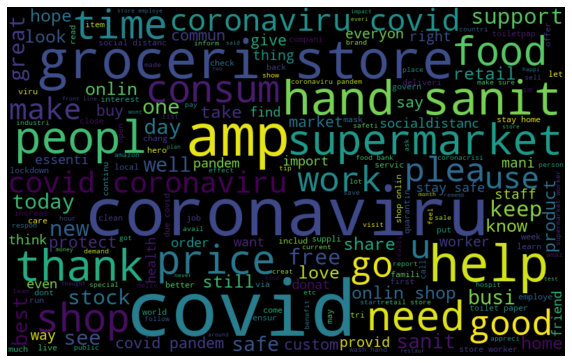

In [252]:
# create cloud from just Extremely Positive tweets
normal_words = ' '.join([text for text in df['clean_tweets'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

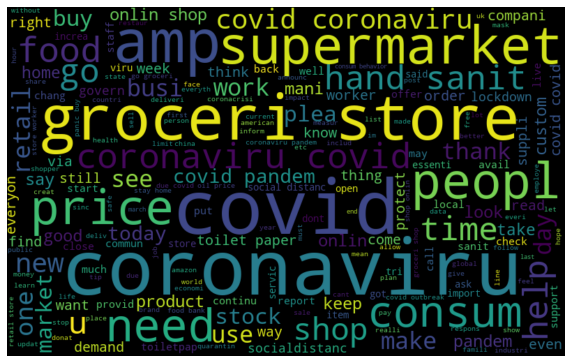

In [253]:
# create cloud from just Positive tweets
normal_words = ' '.join([text for text in df['clean_tweets'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

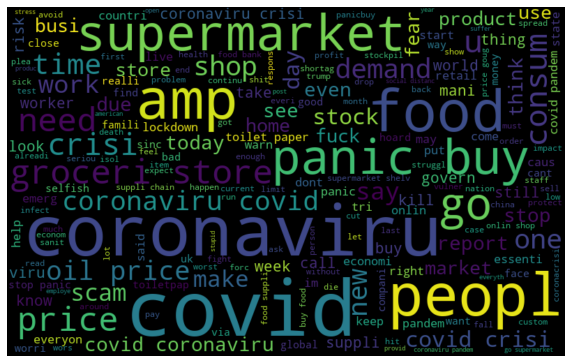

In [254]:
# create cloud from just Extremely Negative tweets
normal_words = ' '.join([text for text in df['clean_tweets'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

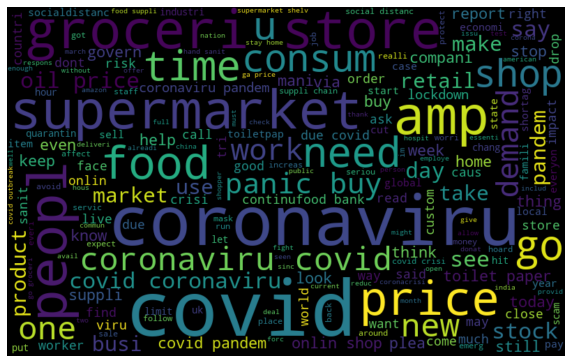

In [255]:
# create cloud from just Extremely Negative tweets
normal_words = ' '.join([text for text in df['clean_tweets'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

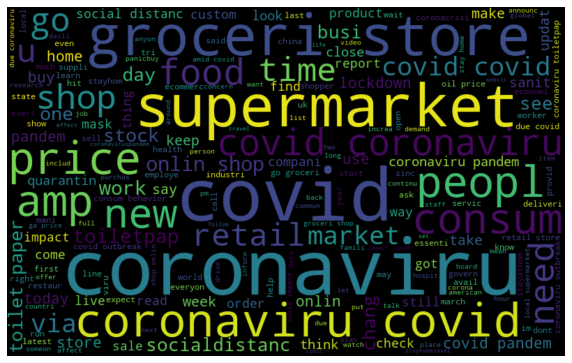

In [256]:
# create cloud from just Neutral tweets
normal_words = ' '.join([text for text in df['clean_tweets'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [257]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [258]:
df['clean_tweets'].apply(lambda x: [item for item in x if item not in stop])

0         [e, n, r, b,  , p, h, l, g, h, n,  , c, h, r, v]
1        [v, c,  , l, k,  , n, e, g, h, b, u, r,  , f, ...
2        [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, ...
3        [n, e, w,  , r, e, g, n,  , f, r,  , c, n, f, ...
4        [c, h, e, r,  , g, r, c, e, r,  , r, e,  , h, ...
                               ...                        
32562    [r, e, l, l,  , h,  , u, c, h,  , h, e,  , c, ...
32563    [l, l,  , h, c, k,  , n, u, b, e, r,  , r, n, ...
32564    [n, e, v, e, r,  , u,  , p,  , w, r, l,  , g, ...
32565    [r, l, n,  , p, l,  , f, f, e, r,  , c, k,  , ...
32566    [r, c,  , w, e, l, l,  , n, e, w, u,  , r, f, ...
Name: clean_tweets, Length: 32567, dtype: object

In [260]:
df.isnull().sum()

index            0
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
clean_tweets     0
dtype: int64

# **Model Training**

##Train - Test Split

In [262]:
new_df = df[['clean_tweets','Sentiment']]

In [263]:
# specify input and output attributes
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (26053, 2)
valid shape :  (6514, 2)


## Use Of Counter Vectorizer For Multi Class Classification

In [267]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.clean_tweets.values)
X_valid = vectorizer.transform(valid.clean_tweets.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("x_train.shape : ", X_train.shape)
print("x_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

x_train.shape :  (26053, 33959)
x_train.shape :  (6514, 33959)
y_train.shape :  (26053,)
y_valid.shape :  (6514,)


## Naive Bayes Classifier for MULTICLASS Classification

In [270]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.7253291367596821
Validation accuracy Score :  0.4580902671169788
                    precision    recall  f1-score   support

Extremely Negative       0.29      0.62      0.39       391
Extremely Positive       0.39      0.62      0.48       666
          Negative       0.49      0.40      0.44      1879
           Neutral       0.27      0.65      0.38       508
          Positive       0.68      0.40      0.50      3070

          accuracy                           0.46      6514
         macro avg       0.42      0.54      0.44      6514
      weighted avg       0.54      0.46      0.47      6514



## Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [272]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.8918742563236479
Validation accuracy Score :  0.566011667178385
                    precision    recall  f1-score   support

Extremely Negative       0.63      0.63      0.63       847
Extremely Positive       0.71      0.65      0.68      1148
          Negative       0.48      0.48      0.48      1567
           Neutral       0.70      0.57      0.63      1521
          Positive       0.43      0.55      0.48      1431

          accuracy                           0.57      6514
         macro avg       0.59      0.58      0.58      6514
      weighted avg       0.58      0.57      0.57      6514



## RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [274]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9999616167044102
Validation accuracy Score :  0.5500460546515198
                    precision    recall  f1-score   support

Extremely Negative       0.36      0.71      0.48       436
Extremely Positive       0.35      0.73      0.47       508
          Negative       0.52      0.50      0.51      1623
           Neutral       0.76      0.60      0.67      1578
          Positive       0.64      0.49      0.55      2369

          accuracy                           0.55      6514
         macro avg       0.53      0.60      0.54      6514
      weighted avg       0.60      0.55      0.56      6514



## Extreme Gradient Boosting ( For Multiclass Classification)

In [275]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.5034353049552834
Validation accuracy Score :  0.47973595333128644
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.60      0.46       523
Extremely Positive       0.42      0.72      0.53       622
          Negative       0.38      0.43      0.40      1390
           Neutral       0.55      0.46      0.50      1492
          Positive       0.60      0.44      0.50      2487

          accuracy                           0.48      6514
         macro avg       0.47      0.53      0.48      6514
      weighted avg       0.51      0.48      0.48      6514



## Support vector machine( For Multiclass Classification)

In [276]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9081487736537059
Validation accuracy Score :  0.5833589192508444
                    precision    recall  f1-score   support

Extremely Negative       0.44      0.72      0.55       520
Extremely Positive       0.53      0.78      0.63       714
          Negative       0.53      0.51      0.52      1609
           Neutral       0.68      0.62      0.64      1354
          Positive       0.67      0.52      0.59      2317

          accuracy                           0.58      6514
         macro avg       0.57      0.63      0.59      6514
      weighted avg       0.60      0.58      0.58      6514



## Logistic Regression(For Multiclass Classification)

In [277]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9342110313591525
Validation accuracy Score :  0.6000921093030396
                    precision    recall  f1-score   support

Extremely Negative       0.55      0.67      0.60       699
Extremely Positive       0.65      0.70      0.67       971
          Negative       0.54      0.53      0.53      1589
           Neutral       0.68      0.61      0.64      1381
          Positive       0.59      0.58      0.58      1874

          accuracy                           0.60      6514
         macro avg       0.60      0.62      0.61      6514
      weighted avg       0.60      0.60      0.60      6514



In [279]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.600092
0,Support Vector Machines,0.583359
4,Stochastic Gradient Decent,0.566012
2,Random Forest,0.550046
5,XGBoost,0.479736
3,Naive Bayes,0.458090


## CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION

In [281]:
binary = new_df[['clean_tweets','Sentiment']]

In [282]:
binary["Sentiment"]= binary["Sentiment"].replace('Positive',1) 
binary["Sentiment"]= binary["Sentiment"].replace('Extremely Positive',1) 
binary["Sentiment"]= binary["Sentiment"].replace('Neutral',1) 
binary["Sentiment"]= binary["Sentiment"].replace('Negative',0) 
binary["Sentiment"]= binary["Sentiment"].replace('Extremely Negative',0) 


In [283]:
binary['Sentiment'].value_counts()

1    20555
0    12012
Name: Sentiment, dtype: int64

In [284]:
X = binary.drop('Sentiment', axis=1)
y = binary.Sentiment

In [285]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [286]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [287]:
binary['clean_tweets'].apply(lambda x: [item for item in x if item not in stop])

0         [e, n, r, b,  , p, h, l, g, h, n,  , c, h, r, v]
1        [v, c,  , l, k,  , n, e, g, h, b, u, r,  , f, ...
2        [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, ...
3        [n, e, w,  , r, e, g, n,  , f, r,  , c, n, f, ...
4        [c, h, e, r,  , g, r, c, e, r,  , r, e,  , h, ...
                               ...                        
32562    [r, e, l, l,  , h,  , u, c, h,  , h, e,  , c, ...
32563    [l, l,  , h, c, k,  , n, u, b, e, r,  , r, n, ...
32564    [n, e, v, e, r,  , u,  , p,  , w, r, l,  , g, ...
32565    [r, l, n,  , p, l,  , f, f, e, r,  , c, k,  , ...
32566    [r, c,  , w, e, l, l,  , n, e, w, u,  , r, f, ...
Name: clean_tweets, Length: 32567, dtype: object

## DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [288]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(binary,test_size = 0.2,random_state=0,stratify = binary.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (26053, 2)
valid shape :  (6514, 2)


## USING COUNT VECTORIZER

In [290]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.clean_tweets.values)
X_valid = vectorizer.transform(valid.clean_tweets.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (26053, 34019)
X_train.shape :  (6514, 34019)
y_train.shape :  (26053,)
y_valid.shape :  (6514,)


## NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.

In [291]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.875753272175949
Validation accuracy Score :  0.7844642308873196
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      2157
           1       0.86      0.81      0.83      4357

    accuracy                           0.78      6514
   macro avg       0.76      0.77      0.76      6514
weighted avg       0.79      0.78      0.79      6514



## RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [292]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.8269880257906048
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      2032
           1       0.91      0.83      0.87      4482

    accuracy                           0.83      6514
   macro avg       0.80      0.82      0.81      6514
weighted avg       0.84      0.83      0.83      6514



## LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [293]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9537865121099297
Validation accuracy Score :  0.8523180841264968
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      2171
           1       0.91      0.86      0.89      4343

    accuracy                           0.85      6514
   macro avg       0.83      0.85      0.84      6514
weighted avg       0.86      0.85      0.85      6514



## CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [297]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 98 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [298]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [299]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [300]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.8865773615322612
Validation accuracy Score :  0.8444887933681302
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      2006
           1       0.93      0.84      0.88      4508

    accuracy                           0.84      6514
   macro avg       0.82      0.85      0.83      6514
weighted avg       0.86      0.84      0.85      6514



## XG BOOST( BINARY CLASSIFICATION)

In [301]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.7475914482017426
Validation accuracy Score :  0.7439361375498925
              precision    recall  f1-score   support

           0       0.37      0.85      0.52      1059
           1       0.96      0.72      0.83      5455

    accuracy                           0.74      6514
   macro avg       0.67      0.79      0.67      6514
weighted avg       0.87      0.74      0.78      6514



## SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [302]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9605419721337274
Validation accuracy Score :  0.830211851396991
              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1853
           1       0.93      0.82      0.87      4661

    accuracy                           0.83      6514
   macro avg       0.79      0.84      0.81      6514
weighted avg       0.85      0.83      0.84      6514



# **Winner Model:**

## Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [303]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.954861244386443
Validation accuracy Score :  0.8529321461467608
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      2213
           1       0.91      0.87      0.89      4301

    accuracy                           0.85      6514
   macro avg       0.83      0.85      0.84      6514
weighted avg       0.86      0.85      0.85      6514



In [304]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

[[ 8787   822]
 [  354 16090]]


[Text(0.5, 0, 'Negative'), Text(1.5, 0, 'Positive')]

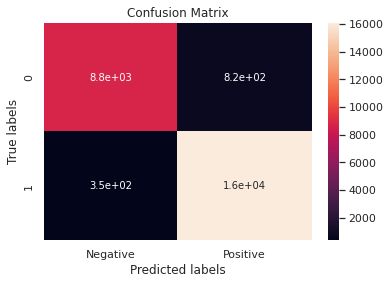

In [305]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

In [306]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

accuracy is 0.8529321461467608


In [307]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

0.8392880394517694


In [309]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

scikit score: 0.8529321461467608


In [308]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')

0.8338619942456184

In [310]:
# Classification Report for our stochastic gradient descent algorithm
classification_report(y_valid,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.76      0.79      2403\n           1       0.87      0.91      0.89      4111\n\n    accuracy                           0.85      6514\n   macro avg       0.85      0.83      0.84      6514\nweighted avg       0.85      0.85      0.85      6514\n'

In [311]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

array([[1829,  574],
       [ 384, 3727]])

# EVALUATION OF ALL BINARY CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [312]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
4,Stochastic Gradient Decent,0.852932
1,Logistic Regression,0.852318
6,CatBoost,0.844489
0,Support Vector Machines,0.830212
2,Random Forest,0.826988
3,Naive Bayes,0.784464
5,XGBoost,0.743936


# **Conclusion**

##Conclusion On EDA

---

*   Original Dataset contains 6 columns and 41157 rows.
*   Location column contains null values. So, we have dropped the null values.
*   And we added a new column "clean_tweets" after cleaning the tweets.
*   After dropping and adding a new column, now we have 7 columns and 32567 rows. 
*   In order to analyze the data we required only two columns "OriginalTweet" and "Sentiment".
*   The columns such as "UserName" and "ScreenName" does not give any meaningful insights for our analysis.
*   There are five types of sentiments - Extremely Positive, Positive, Extremely Negative, Negative and Neutral.
*   We have renamed the Extremely Positive and Extremely Negative sentiments to Positive and Negative respectively. And we are left with three types of sentiments - Positive, Negative and Neutral.
*  The pie chart shows the proportion of sentiments. 
*   Bar plot for unique values shows us the number of unique values in each column.
*   The graphical representation of top 10 locations shows us that most of the tweets came from London followed by United States.

##Conclusion On Model Training

---


For multiclass classification, the best model for this dataset would be Logistic Regression

For binary classification, the best model for this dataset would be Stochastic Gradient Descent.











